In [124]:
import pandas as pd
import numpy as np

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
path = '/content/drive/MyDrive/true_car_listings.csv'

In [127]:
df = pd.read_csv(path)
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [128]:
df.shape

(852122, 8)

In [129]:
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [130]:
df.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [131]:
df = df.drop_duplicates()
df.shape[0]

852092

In [132]:
df_cleaned = df.drop_duplicates('Vin', keep=False)
df_cleaned.shape[0]

852058

In [133]:
df_cleaned.reset_index(drop=True, inplace=True)

In [134]:
df_cleaned.isnull().any()

Price      False
Year       False
Mileage    False
City       False
State      False
Vin        False
Make       False
Model      False
dtype: bool

In [135]:
for col in df_cleaned.columns:
  if df_cleaned[col].dtype not in [np.int64, np.float64]:

    print('Unique Values for {}'.format(col))
    print(df_cleaned[col].unique())
    print('')

Unique Values for City
['El Paso' 'Long Island City' 'Windsor' ... 'Winslow' 'Bergenfield'
 'Belmont']

Unique Values for State
[' TX' ' NY' ' CO' ' UT' ' FL' ' CT' ' ID' ' ND' ' CA' ' NJ' ' OH' ' VA'
 ' IN' ' AZ' ' OR' ' KS' ' NE' ' MA' ' MD' ' GA' ' MN' ' HI' ' LA' ' NM'
 ' IL' ' AL' ' PA' ' SC' ' NC' ' WA' ' WI' ' OK' ' KY' ' MS' ' MO' ' ME'
 ' AR' ' MI' ' NV' ' TN' ' Fl' ' NH' ' DE' ' WV' ' Az' ' VT' ' SD' ' IA'
 ' RI' ' ga' ' Oh' ' MT' ' DC' ' AK' ' Va' ' WY' ' Md' ' Ca' ' Ga']

Unique Values for Vin
['19VDE2E53EE000083' '19VDE1F52DE012636' '19VDE2E52DE000025' ...
 'YV4A22PL4G1000868' 'YV4A22NLXH1006162' 'YV4BC0ZX1H1109845']

Unique Values for Make
['Acura' 'Alfa' 'AM' 'Aston' 'Audi' 'Bentley' 'BMW' 'Buick' 'Cadillac'
 'Chevrolet' 'Chrysler' 'Dodge' 'Ferrari' 'FIAT' 'Fisker' 'Ford'
 'Freightliner' 'Genesis' 'Geo' 'GMC' 'Honda' 'HUMMER' 'Hyundai'
 'INFINITI' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Lamborghini' 'Land' 'Lexus'
 'Lincoln' 'Lotus' 'Maserati' 'Maybach' 'Mazda' 'McLaren' 'Mercede

In [136]:
df_cleaned.loc[:, 'State'] = df_cleaned['State'].apply(lambda x: x.strip())
df_cleaned.loc[:, 'State'] = df_cleaned['State'].apply(lambda x: x.upper())

In [154]:
df_cleaned = df_cleaned.rename(columns={'Vin': 'VIN'})

In [148]:
df_cleaned.loc[:, 'Make'] = df_cleaned['Make'].apply(lambda x: x.lower())
df_cleaned.loc[:, 'Model'] = df_cleaned['Model'].apply(lambda x: x.lower())

<Axes: >

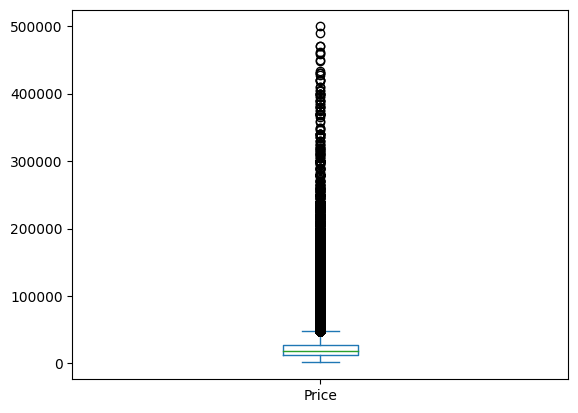

In [137]:
df_cleaned['Price'].plot(kind='box')

<Axes: ylabel='Frequency'>

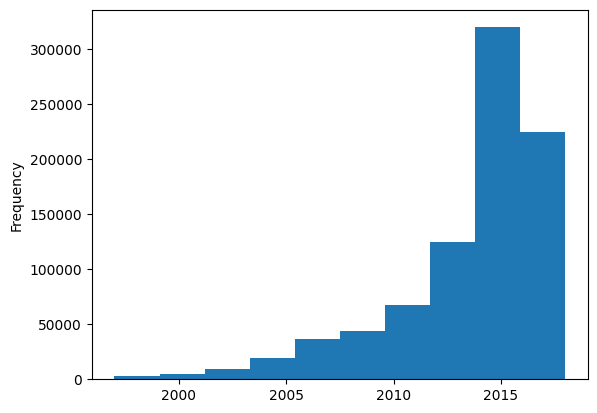

In [138]:
df_cleaned['Year'].plot(kind='hist')

<Axes: >

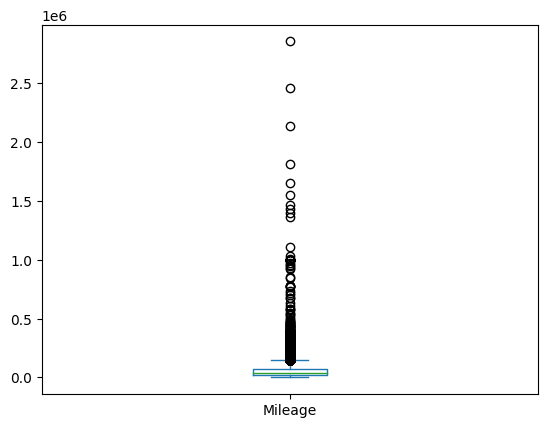

In [139]:
df_cleaned['Mileage'].plot(kind='box')

<Axes: xlabel='State'>

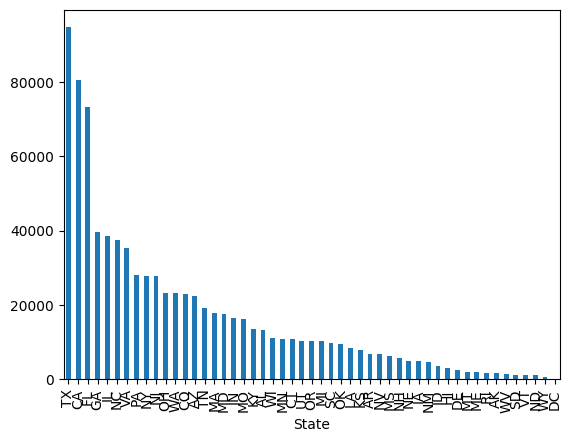

In [140]:
df_cleaned['State'].value_counts().plot(kind='bar')

<Axes: xlabel='Make'>

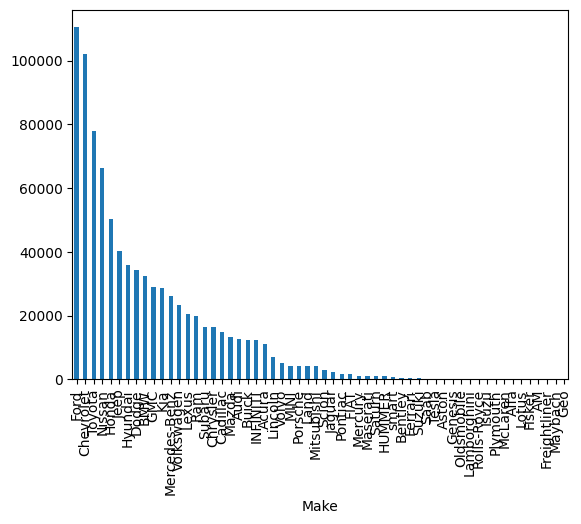

In [141]:
df_cleaned['Make'].value_counts().plot(kind='bar')

In [144]:
usage_by_col = df_cleaned.memory_usage(deep=True) # returns memory usage for each column
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6 # convert to megabytes
mbs

299.17589

In [164]:
df_cleaned = df_cleaned[df_cleaned['VIN'].str.len() >= 17].reset_index(drop=True)

In [166]:
df_cleaned.to_csv('used_car_preds.csv', index=False)

In [167]:
from google.colab import files
files.download('used_car_preds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>